In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [14]:
import sys
sys.path.append('../..')
from src.svm.main import train

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [16]:
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))

In [17]:
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

In [18]:
predictor = train(X, y)

     pcost       dcost       gap    pres   dres
 0: -6.3923e-01 -1.6110e+00  3e+01  5e+00  2e-16
 1: -5.0818e-01 -1.4480e+00  2e+00  2e-01  3e-16
 2: -4.3125e-01 -6.7160e-01  2e-01  7e-17  4e-16
 3: -4.4581e-01 -4.8638e-01  4e-02  5e-17  2e-16
 4: -4.6081e-01 -4.6506e-01  4e-03  6e-17  1e-16
 5: -4.6287e-01 -4.6323e-01  4e-04  7e-17  2e-16
 6: -4.6303e-01 -4.6306e-01  3e-05  5e-17  2e-16
 7: -4.6305e-01 -4.6305e-01  3e-06  5e-17  2e-16
 8: -4.6305e-01 -4.6305e-01  4e-07  6e-17  5e-17
Optimal solution found.


In [19]:
num_samples = 10
num_features = 3
grid_size = 20

samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

predictor = train(X, y)

     pcost       dcost       gap    pres   dres
 0: -6.3923e-01 -1.6110e+00  3e+01  5e+00  2e-16
 1: -5.0818e-01 -1.4480e+00  2e+00  2e-01  3e-16
 2: -4.3125e-01 -6.7160e-01  2e-01  7e-17  4e-16
 3: -4.4581e-01 -4.8638e-01  4e-02  5e-17  2e-16
 4: -4.6081e-01 -4.6506e-01  4e-03  6e-17  1e-16
 5: -4.6287e-01 -4.6323e-01  4e-04  7e-17  2e-16
 6: -4.6303e-01 -4.6306e-01  3e-05  5e-17  2e-16
 7: -4.6305e-01 -4.6305e-01  3e-06  5e-17  2e-16
 8: -4.6305e-01 -4.6305e-01  4e-07  6e-17  5e-17
Optimal solution found.


In [20]:
X = samples
y = labels

In [21]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size),
                     indexing='ij')
flatten = lambda m: np.array(m).reshape(-1,)

result = []
for (i, j) in itertools.product(range(grid_size), range(grid_size)):
    point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
    result.append(predictor.predict(point))

Z = np.array(result).reshape(xx.shape)

plt.contourf(xx, yy, Z,
             cmap=cm.Paired,
             levels=[-0.001, 0.001],
             extend='both',
             alpha=0.8)
plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
            c=flatten(y), cmap=cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

ValueError: shapes (1,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)

In [24]:
num_samples = 10
num_features = 2
grid_size = 20

samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

predictor = train(samples, labels)

     pcost       dcost       gap    pres   dres
 0: -2.1504e+00 -2.0701e+00  5e+01  7e+00  2e-16
 1: -6.0998e-01 -1.9173e+00  3e+00  2e-01  4e-16
 2: -4.9734e-01 -8.6101e-01  4e-01  6e-17  4e-16
 3: -5.1874e-01 -5.6989e-01  5e-02  5e-17  3e-16
 4: -5.3941e-01 -5.4399e-01  5e-03  5e-17  2e-16
 5: -5.4126e-01 -5.4137e-01  1e-04  5e-17  2e-16
 6: -5.4130e-01 -5.4130e-01  1e-06  7e-17  3e-16
 7: -5.4130e-01 -5.4130e-01  1e-08  5e-17  2e-16
Optimal solution found.


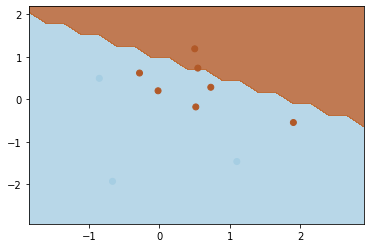

In [25]:
X = samples
y = labels
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size),
                     indexing='ij')
flatten = lambda m: np.array(m).reshape(-1,)

result = []
for (i, j) in itertools.product(range(grid_size), range(grid_size)):
    point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
    result.append(predictor.predict(point))

Z = np.array(result).reshape(xx.shape)

plt.contourf(xx, yy, Z,
             cmap=cm.Paired,
             levels=[-0.001, 0.001],
             extend='both',
             alpha=0.8)
plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
            c=flatten(y), cmap=cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

     pcost       dcost       gap    pres   dres
 0: -2.0707e+01 -2.0394e+01  7e+02  3e+01  1e-15
 1: -3.9948e+00 -1.9176e+01  5e+01  1e+00  2e-15
 2: -2.4637e+00 -1.0114e+01  8e+00  2e-16  7e-16
 3: -3.1291e+00 -4.1808e+00  1e+00  2e-16  4e-16
 4: -3.5429e+00 -3.7628e+00  2e-01  2e-16  4e-16
 5: -3.6133e+00 -3.6769e+00  6e-02  3e-16  4e-16
 6: -3.6340e+00 -3.6561e+00  2e-02  2e-16  4e-16
 7: -3.6434e+00 -3.6456e+00  2e-03  2e-16  4e-16
 8: -3.6444e+00 -3.6444e+00  4e-05  2e-16  5e-16
 9: -3.6444e+00 -3.6444e+00  4e-07  2e-16  4e-16
Optimal solution found.


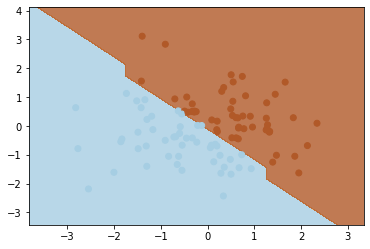

In [26]:
num_samples = 100
num_features = 2
grid_size = 20

samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

predictor = train(samples, labels)
X = samples
y = labels
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                     np.linspace(y_min, y_max, grid_size),
                     indexing='ij')
flatten = lambda m: np.array(m).reshape(-1,)

result = []
for (i, j) in itertools.product(range(grid_size), range(grid_size)):
    point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
    result.append(predictor.predict(point))

Z = np.array(result).reshape(xx.shape)

plt.contourf(xx, yy, Z,
             cmap=cm.Paired,
             levels=[-0.001, 0.001],
             extend='both',
             alpha=0.8)
plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
            c=flatten(y), cmap=cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()